# Current distribution in a conductor based on impedance matrix

### Initial properties

In [59]:
import math

#Current in a bar [A]
I1 = 2000

#frequency [Hz]
f = 50

#conductivity [S/m]
s = 56e6

#Conductor dimensions
l = 1000/1000 #length [m]
h = 100/1000 #height [m]
w = 10/1000 #width [m]

#Angular frequency [rad/s]
omega = 2*math.pi*f

#number of divisions of the conductor along the height
n = 100

#unit dimensions of a piece of the conductor
dy = h/n #unit height [m]
dA = dy*w #unit area [m2]

The goal is to solve a matrix equation given with this formula

$\mathbf{Z} \mathbf{I} = \mathbf {u} $

where:
Z is the impedance matrix; <br>
I is the current distribution vector; <br>
u is the voltage vector

In [60]:
#supply voltage [V]
u1 = 1

#voltage vector
u = [u1 for i in range(0, n)]

#own inductance of a piece of the conductor
L = 1e-9*2*100*l*(math.log(2*l/(0.5*dy))-3/4)

#resistance of a piece of the conductor [Ohm]
R = l/(s*dA)

In [61]:
L, R

(1.5088099280204057e-06, 0.0017857142857142857)

In [62]:
import numpy as np

#impedance matrix calculation
Z = np.zeros((n,n), dtype=complex)

for i in range(0, n):
    for j in range(0, n):
        if i==j:
            Z[i,j]=R+1j*omega*L
        else:
            Z[i,j]=1j*omega*1e-9*2*l*100*(math.log(2*l*100/(abs(10*i-10*j)/10))-3/4)

In [63]:
#Mutual inductance matrix

M = np.zeros((n,n), dtype=complex)

for i in range(0, n):
    for j in range(0, n):
        if i==j:
            M[i,j]=0
        else:
            M[i,j]=1e-9*2*l*100*(math.log(2*l*100/(abs(10*i-10*j)/10))-3/4)

In [64]:
from scipy import linalg

I = linalg.solve(Z,u)

In [65]:
#Calibrating for the current
cal = np.sum(I)

#calibrated current
Ical = [I1*I[i]/cal for i in range(0, n)]

#Current density 
J = [Ical[i]/(w*dy*10**6) for i in range(0, n)]

#mode of the current density
modJ = [abs(J[i]) for i in range(0, n)]

#phase of the current density
phJ = [math.degrees(math.atan(J[i].imag/J[i].real)) for i in range(0, n)]

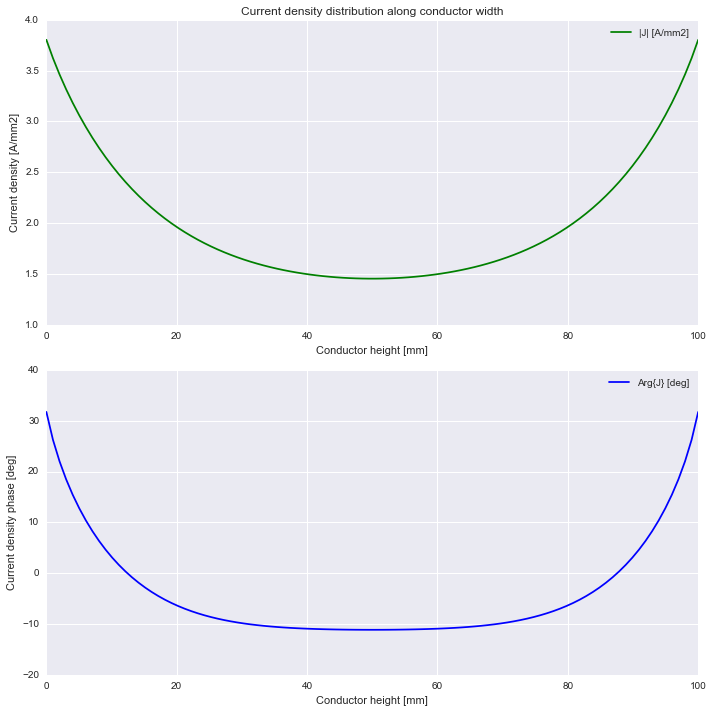

In [66]:
#Plotting
import seaborn
import matplotlib.pyplot as plt
%matplotlib inline

#conductor height vector
y = np.linspace(0, 100, n)

#plot preparation
fig, ax = plt.subplots(2, figsize=(10,10))

ax[0].plot(y,modJ, label="|J| [A/mm2]", color = "green")
ax[0].set_ylabel("Current density [A/mm2]")
ax[0].set_xlabel("Conductor height [mm]")
ax[0].set_title("Current density distribution along conductor width")
ax[0].legend()

ax[1].plot(y,phJ, label="Arg{J} [deg]", color = "blue")
ax[1].set_ylabel("Current density phase [deg]")
ax[1].set_xlabel("Conductor height [mm]")
ax[1].legend()
plt.tight_layout()



### Power loss calculation

In [69]:
#Calculating the module of the current
modI = [abs(Ical[i]) for i in range(0, n)]

Pac = sum([abs(Ical[i])**2*R for i in range(0, n)])

Pdc = I1**2*l/(s*h*w)

k = Pac/Pdc

In [70]:
Pac, Pdc, k

(82.417970689250325, 71.42857142857143, 1.1538515896495045)